In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('default of credit card clients.xls', header = 1, index_col='ID')

In [3]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
df[['default payment next month']].value_counts()

default payment next month
0                             23364
1                              6636
dtype: int64

# Balancing dataset

In [ ]:
# idx_zeros = list(df.loc[df['default payment next month']==0,].index)
# idx_ones = list(df.loc[df['default payment next month']==1,].index)
# import random
# idx_zeros_new = random.sample(idx_zeros, len(idx_ones))
# idx = idx_ones.copy()
# idx = idx_ones + idx_zeros_new
# X = X.loc[idx]

In [6]:
X = df.drop(columns=['default payment next month'])

In [7]:
y = df[['default payment next month']]

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2015)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(21000, 23)
(21000, 1)
(9000, 23)
(9000, 1)


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

In [104]:
model = Sequential()
model.add(Dense(32, input_shape=(23,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'sigmoid'))

In [105]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 32)                768       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32)                128       
_________________________________________________________________
dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_34 (Batc (None, 64)                256       
_________________________________________________________________
dense_65 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_35 (Batc (None, 128)               512       
_________________________________________________________________
dense_66 (Dense)             (None, 128)             

In [106]:
from tensorflow.keras.metrics import Accuracy, FalseNegatives
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping

In [107]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' ,metrics=['accuracy'])

In [108]:
#callback = EarlyStopping(monitor='loss', patience=4)

In [109]:
model.fit( 
    x=X_train,
    y=y_train,
    batch_size=16,
    epochs=100,
    verbose=2,
    #callbacks=[callback],
    validation_split=0.3,
    shuffle=True)

Train on 14699 samples, validate on 6301 samples
Epoch 1/100
14699/14699 - 4s - loss: 0.5108 - accuracy: 0.7866 - val_loss: 0.4584 - val_accuracy: 0.8165
Epoch 2/100
14699/14699 - 2s - loss: 0.4783 - accuracy: 0.7999 - val_loss: 0.4467 - val_accuracy: 0.8140
Epoch 3/100
14699/14699 - 2s - loss: 0.4702 - accuracy: 0.8039 - val_loss: 0.4402 - val_accuracy: 0.8184
Epoch 4/100
14699/14699 - 3s - loss: 0.4624 - accuracy: 0.8040 - val_loss: 0.4365 - val_accuracy: 0.8227
Epoch 5/100
14699/14699 - 3s - loss: 0.4613 - accuracy: 0.8086 - val_loss: 0.4410 - val_accuracy: 0.8181
Epoch 6/100
14699/14699 - 3s - loss: 0.4601 - accuracy: 0.8056 - val_loss: 0.4372 - val_accuracy: 0.8127
Epoch 7/100
14699/14699 - 4s - loss: 0.4542 - accuracy: 0.8081 - val_loss: 0.4327 - val_accuracy: 0.8199
Epoch 8/100
14699/14699 - 3s - loss: 0.4547 - accuracy: 0.8082 - val_loss: 0.4354 - val_accuracy: 0.8243
Epoch 9/100
14699/14699 - 3s - loss: 0.4540 - accuracy: 0.8061 - val_loss: 0.4359 - val_accuracy: 0.8199
Epoch 

Epoch 78/100
14699/14699 - 3s - loss: 0.4204 - accuracy: 0.8197 - val_loss: 0.4406 - val_accuracy: 0.8196
Epoch 79/100
14699/14699 - 3s - loss: 0.4193 - accuracy: 0.8196 - val_loss: 0.4342 - val_accuracy: 0.8199
Epoch 80/100
14699/14699 - 3s - loss: 0.4177 - accuracy: 0.8214 - val_loss: 0.4421 - val_accuracy: 0.8162
Epoch 81/100
14699/14699 - 3s - loss: 0.4186 - accuracy: 0.8207 - val_loss: 0.4334 - val_accuracy: 0.8183
Epoch 82/100
14699/14699 - 3s - loss: 0.4177 - accuracy: 0.8205 - val_loss: 0.4414 - val_accuracy: 0.8189
Epoch 83/100
14699/14699 - 3s - loss: 0.4191 - accuracy: 0.8199 - val_loss: 0.4401 - val_accuracy: 0.8197
Epoch 84/100
14699/14699 - 3s - loss: 0.4188 - accuracy: 0.8213 - val_loss: 0.4424 - val_accuracy: 0.8192
Epoch 85/100
14699/14699 - 3s - loss: 0.4162 - accuracy: 0.8248 - val_loss: 0.4391 - val_accuracy: 0.8218
Epoch 86/100
14699/14699 - 4s - loss: 0.4168 - accuracy: 0.8220 - val_loss: 0.4475 - val_accuracy: 0.8169
Epoch 87/100
14699/14699 - 3s - loss: 0.4165 -

In [111]:
model.evaluate(X_test, y_test)

9000/9000 [==============================] - 0s 33us/sample - loss: 0.4570 - accuracy: 0.8142


[0.45701689415507846, 0.8142222]

In [112]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

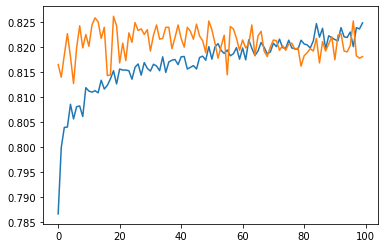

In [113]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label = 'accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')

In [114]:
y_pred = model.predict(X_test)
print(y_pred.shape)

(9000, 2)


In [115]:
y_pred = np.argmax(y_pred, axis = 1)
print(y_pred.shape)

(9000,)


In [116]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[6640  419]
 [1253  688]]
